In [3]:
# %pip install mlrose_hiive@git+https://github.com/hiive/mlrose/

In [1]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import time

## Fitness Problems

### Helper Functions

In [2]:
# Define a function to plot Fitness vs. Iteration
def plot_fitness_vs_iteration(title, curves, labels):
    plt.figure(figsize=(10, 6))
    for curve, label in zip(curves, labels):
        plt.plot(curve, label=label)
    plt.title(f'{title}: Fitness vs. Iteration')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
# Define a function to plot Fitness vs. Problem Size
def plot_fitness_vs_problem_size(title, problem_sizes, curves, labels):
    plt.figure(figsize=(10, 6))
    for curve, label in zip(curves, labels):
        plt.plot(problem_sizes, curve, label=label)
    plt.title(f'{title}: Fitness vs. Problem Size')
    plt.xlabel('Problem Size')
    plt.ylabel('Fitness')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()  
    
def plot_fitness_vs_iteration_grid(title, problem_sizes, results, labels, algorithms):
    fig, axes = plt.subplots(1, len(problem_sizes), figsize=(20, 5 * len(problem_sizes)))
    fig.suptitle(title, fontsize=16)
    
    for i, size in enumerate(problem_sizes):
        for algorithm in algorithms:
            curve = results[i][algorithm]['curve']
            axes[i].plot(curve, label=labels[algorithms.index(algorithm)])
        axes[i].set_title(f'Problem Size: {size}')
        axes[i].set_xlabel('Iterations')
        axes[i].set_ylabel('Fitness')
        axes[i].legend(loc='best')
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    
# Define a function to plot Function Evaluations (fevals)
def plot_fevals(title, curves, labels):
    plt.figure(figsize=(10, 6))
    for curve, label in zip(curves, labels):
        plt.plot(curve, label=label)
    plt.title(f'{title}: Function Evaluations')
    plt.xlabel('Iterations')
    plt.ylabel('Function Evaluations')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
# Define a function to plot Wall Clock Time
def plot_wall_clock_time(title, times, labels):
    plt.figure(figsize=(10, 6))
    plt.bar(labels, times)
    plt.title(f'{title}: Wall Clock Time')
    plt.xlabel('Algorithms')
    plt.ylabel('Time (seconds)')
    plt.grid(True)
    plt.show()

In [3]:
# Function to solve problem using different algorithms and collect data
def solve_problem(problem, max_iters=1000):
    results = {}
    # Randomized Hill Climbing
    start_time = time.time()
    best_state, best_fitness, rhc_curve = mlrose.random_hill_climb(problem, max_iters=max_iters, curve=True, random_state=42)
    rhc_time = time.time() - start_time
    results['RHC'] = {'best_state': best_state, 'best_fitness': best_fitness, 'curve': rhc_curve[:, 0], 'time': rhc_time, 'fevals': rhc_curve[:, 1]}
    
    # Simulated Annealing
    start_time = time.time()
    schedule = mlrose.ExpDecay()
    best_state, best_fitness, sa_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_iters=max_iters, curve=True, random_state=42)
    sa_time = time.time() - start_time
    results['SA'] = {'best_state': best_state, 'best_fitness': best_fitness, 'curve': sa_curve[:, 0], 'time': sa_time, 'fevals': sa_curve[:, 1]}
    
    # Genetic Algorithm
    start_time = time.time()
    best_state, best_fitness, ga_curve = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_iters=max_iters, curve=True, random_state=42)
    ga_time = time.time() - start_time
    results['GA'] = {'best_state': best_state, 'best_fitness': best_fitness, 'curve': ga_curve[:, 0], 'time': ga_time, 'fevals': ga_curve[:, 1]}
    
    # MIMIC
    start_time = time.time()
    best_state, best_fitness, mimic_curve = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_iters=max_iters, curve=True, random_state=42)
    mimic_time = time.time() - start_time
    results['MIMIC'] = {'best_state': best_state, 'best_fitness': best_fitness, 'curve': mimic_curve[:, 0], 'time': mimic_time, 'fevals': mimic_curve[:, 1]}
    
    return results

### Fitness Four Peaks

In [29]:
fitness_four_peaks = mlrose.FourPeaks(t_pct=0.15)
problem_four_peaks = mlrose.DiscreteOpt(length=20, fitness_fn=fitness_four_peaks, maximize=True, max_val=2)

In [30]:
results_four_peaks = solve_problem(problem_four_peaks)

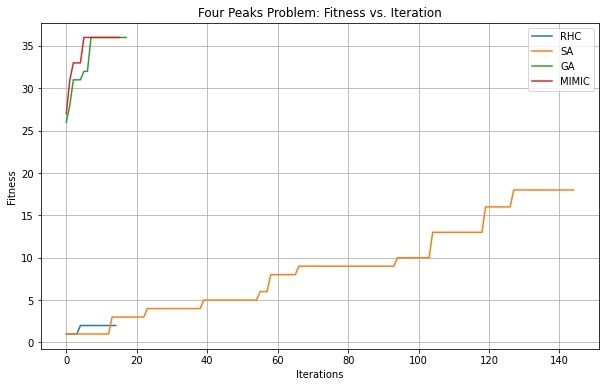

In [32]:
plot_fitness_vs_iteration("Four Peaks Problem", 
                          [results_four_peaks['RHC']['curve'], results_four_peaks['SA']['curve'], results_four_peaks['GA']['curve'], results_four_peaks['MIMIC']['curve']], 
                          ["RHC", "SA", "GA", "MIMIC"])

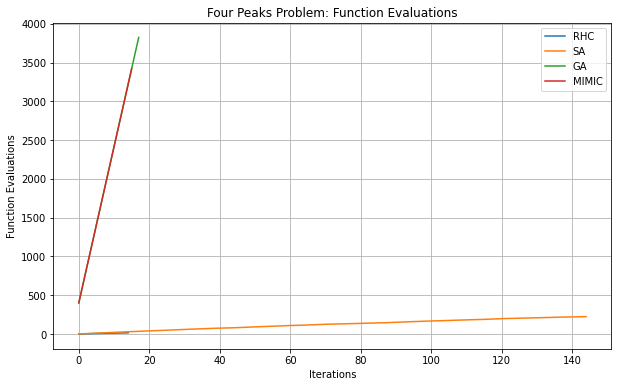

In [33]:
plot_fevals("Four Peaks Problem", 
                          [results_four_peaks['RHC']['fevals'], results_four_peaks['SA']['fevals'], results_four_peaks['GA']['fevals'], results_four_peaks['MIMIC']['fevals']], 
                          ["RHC", "SA", "GA", "MIMIC"])

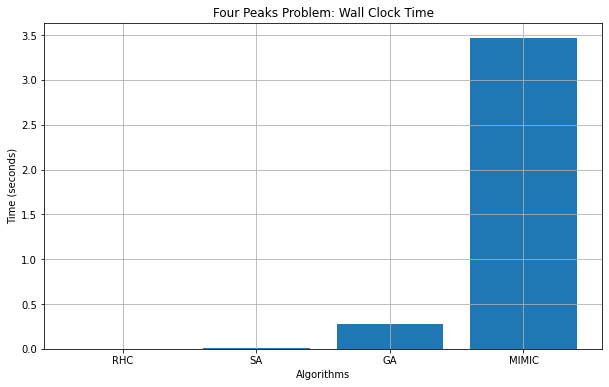

In [34]:
# Plot Wall Clock Time
plot_wall_clock_time("Four Peaks Problem", 
                     [results_four_peaks['RHC']['time'], results_four_peaks['SA']['time'], results_four_peaks['GA']['time'], results_four_peaks['MIMIC']['time']], 
                     ["RHC", "SA", "GA", "MIMIC"])

In [42]:
# Plot Fitness vs. Problem Size
problem_sizes = [10, 50, 100]

In [43]:
problem_set_four_peaks = []
for i in problem_sizes:
    problem_set_four_peaks.append(
    mlrose.DiscreteOpt(length=i, fitness_fn=fitness_four_peaks, maximize=True, max_val=2)
    )

10
50
100


In [44]:
result_four_peak_sets = []
for i in range(len(problem_sizes)):
    print(problem_sizes[i])
    result_four_peak_sets.append(
    solve_problem(problem_set_four_peaks[i])
    )

10
50
100


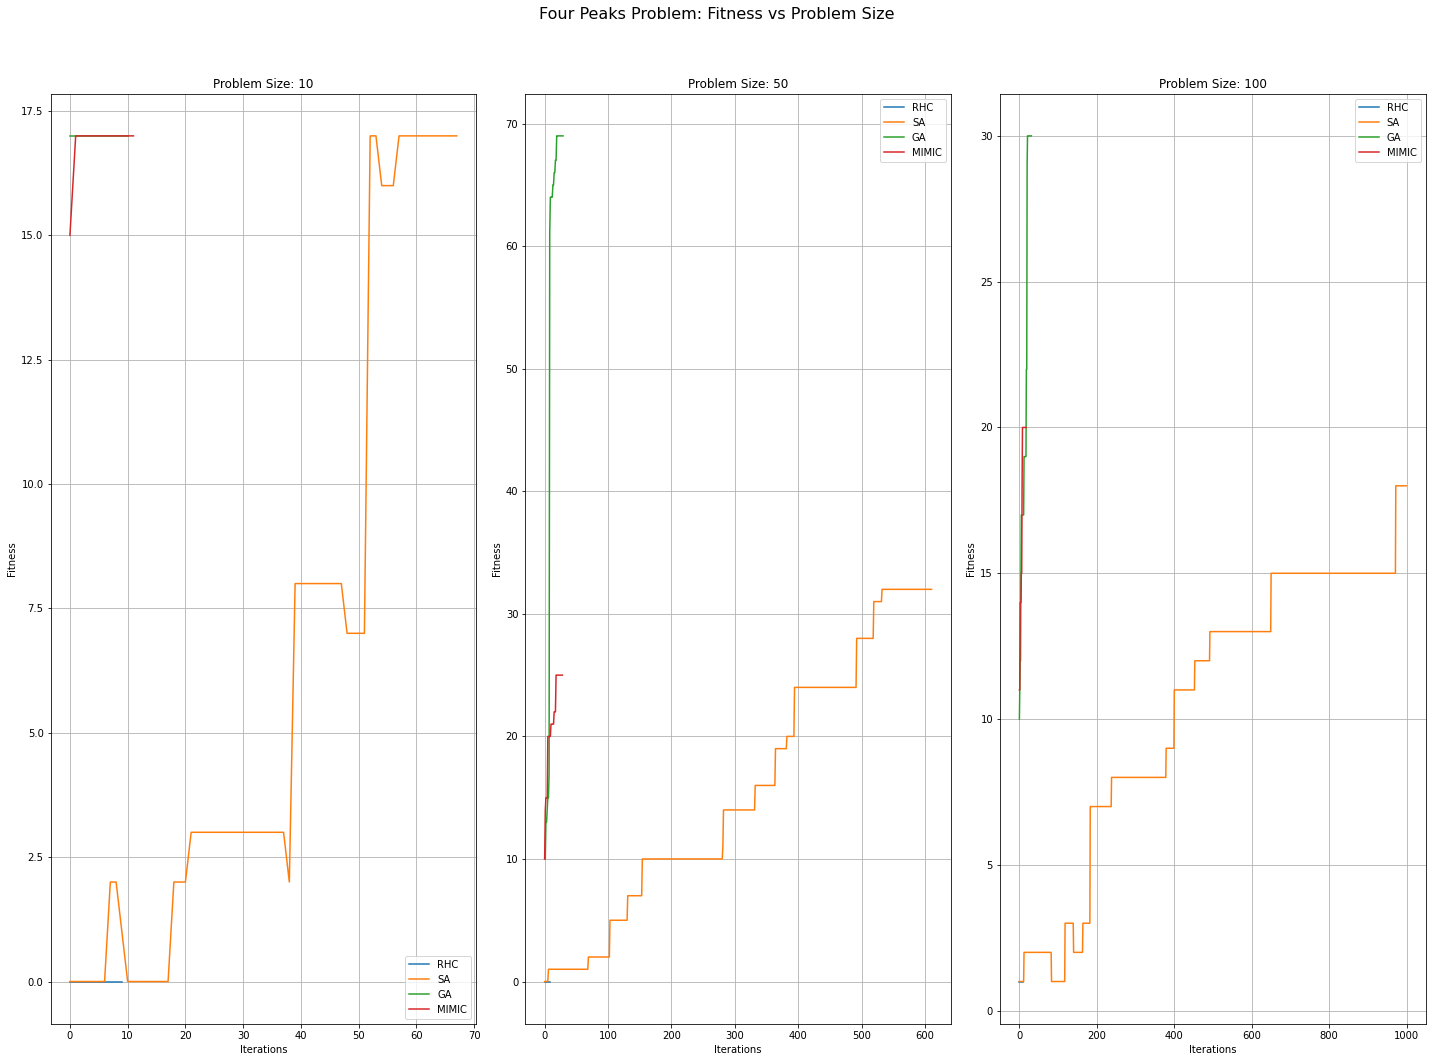

In [54]:
plot_fitness_vs_iteration_grid("Four Peaks Problem: Fitness vs Problem Size", 
                               problem_sizes, 
                               result_four_peak_sets, 
                               labels=["RHC", "SA", "GA", "MIMIC"], 
                               algorithms=["RHC", "SA", "GA", "MIMIC"]
                              )

### One Max Problem

In [57]:
# Define the One Max problem
fitness_one_max = mlrose.OneMax()
problem_one_max = mlrose.DiscreteOpt(length=20, fitness_fn=fitness_one_max, maximize=True, max_val=2)

In [58]:
result_one_max = solve_problem(problem_one_max)

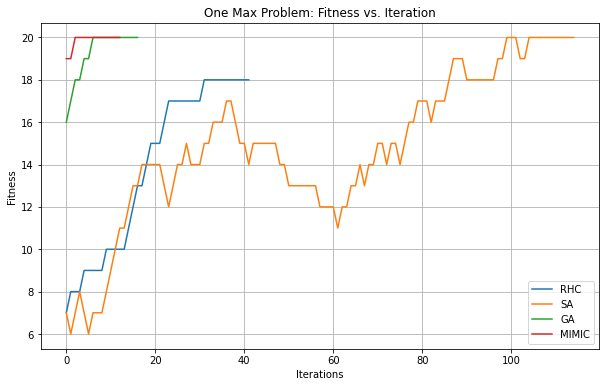

In [59]:
plot_fitness_vs_iteration("One Max Problem", 
                          [result_one_max['RHC']['curve'], result_one_max['SA']['curve'], result_one_max['GA']['curve'], result_one_max['MIMIC']['curve']], 
                          ["RHC", "SA", "GA", "MIMIC"])

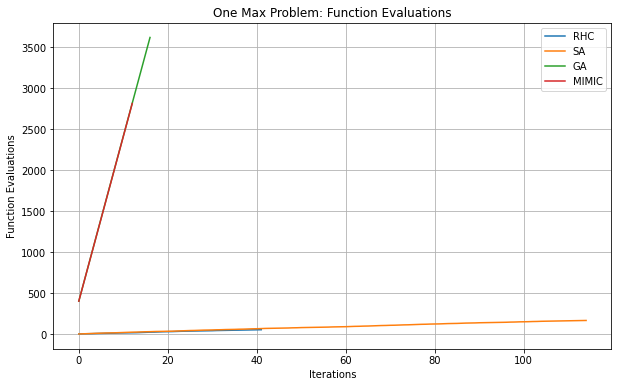

In [60]:
plot_fevals("One Max Problem", 
                          [result_one_max['RHC']['fevals'], result_one_max['SA']['fevals'], result_one_max['GA']['fevals'], result_one_max['MIMIC']['fevals']], 
                          ["RHC", "SA", "GA", "MIMIC"])

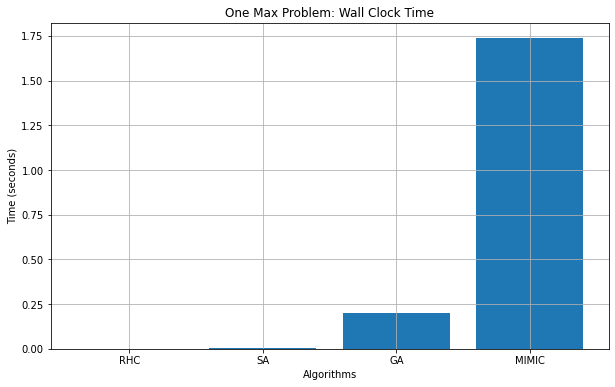

In [61]:
# Plot Wall Clock Time
plot_wall_clock_time("One Max Problem", 
                     [result_one_max['RHC']['time'], result_one_max['SA']['time'], result_one_max['GA']['time'], result_one_max['MIMIC']['time']], 
                     ["RHC", "SA", "GA", "MIMIC"])

In [62]:
problem_set_one_max = []
for i in problem_sizes:
    problem_set_one_max.append(
    mlrose.DiscreteOpt(length=i, fitness_fn=fitness_one_max, maximize=True, max_val=2)
    )

In [63]:
result_one_max_sets = []
for i in range(len(problem_sizes)):
    print(problem_sizes[i])
    result_one_max_sets.append(
    solve_problem(problem_set_one_max[i])
    )

10
50
100


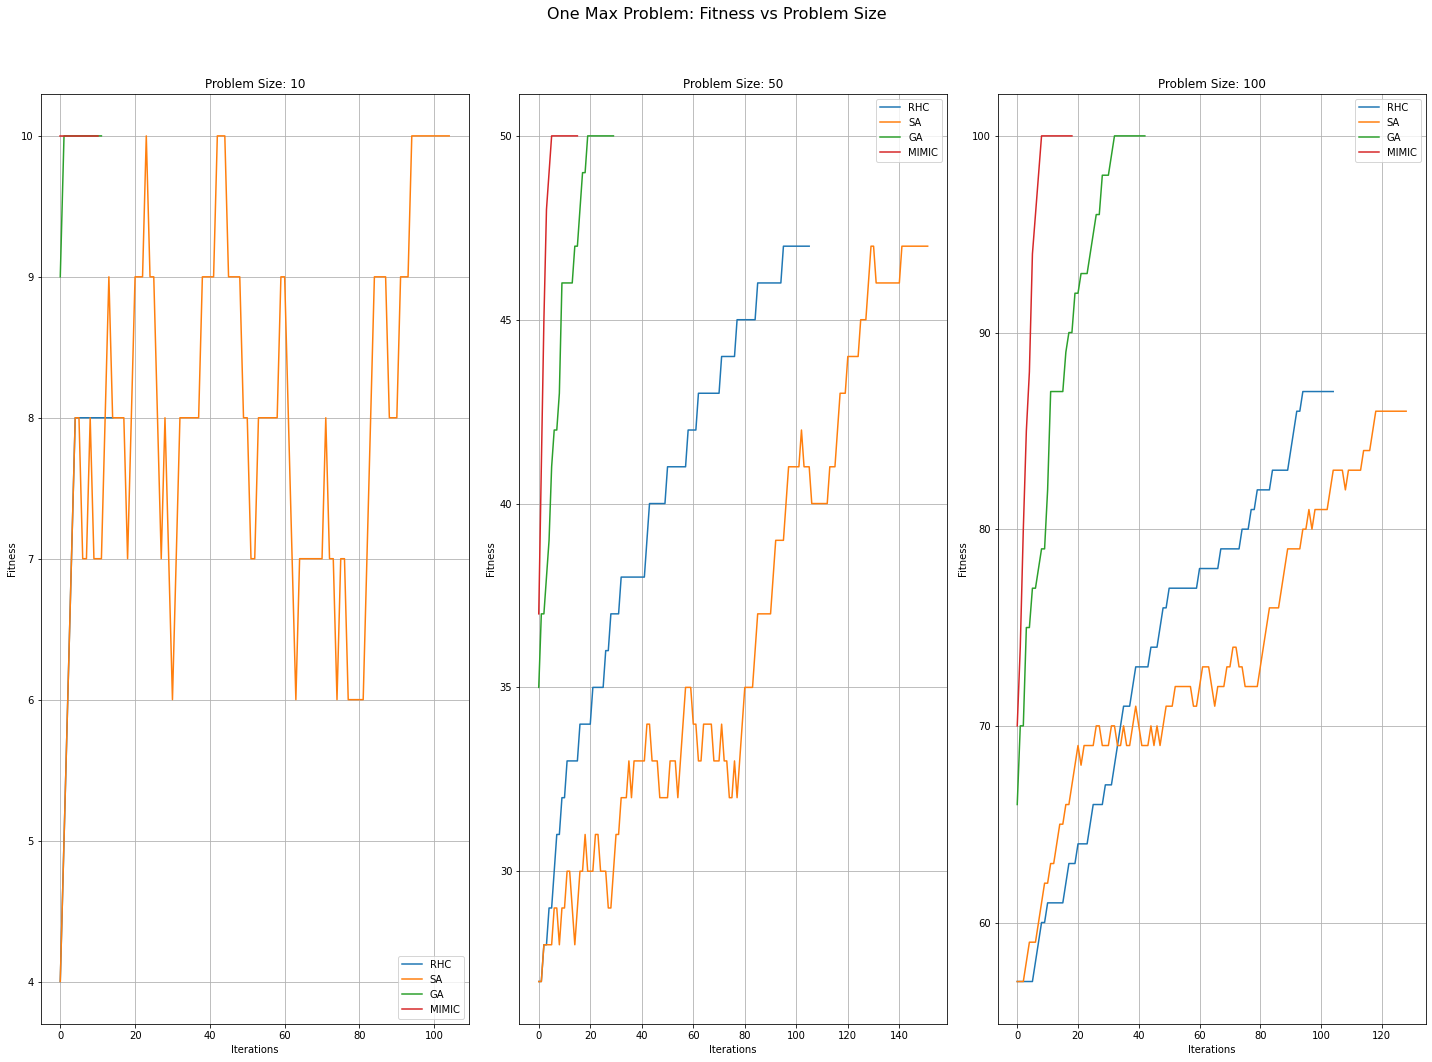

In [64]:
plot_fitness_vs_iteration_grid("One Max Problem: Fitness vs Problem Size", 
                               problem_sizes, 
                               result_one_max_sets, 
                               labels=["RHC", "SA", "GA", "MIMIC"], 
                               algorithms=["RHC", "SA", "GA", "MIMIC"]
                              )

In [65]:
'''
Comment: Both one max and 4 peaks - GA performs better than SA
Checking flip flop bits
'''

'\nComment: Both one max and 4 peaks - GA performs better than SA\nChecking flip flop bits\n'

### Flip Flop

In [66]:
# Define the Flip-Flop fitness function
class FlipFlop:
    def __call__(self, state):
        fitness = 0
        for i in range(1, len(state)):
            if state[i] != state[i-1]:
                fitness += 1
        return fitness

# Create a custom fitness function object
fitness_flip_flop = mlrose.CustomFitness(FlipFlop())

# Define optimization problem object
problem_flip_flop = mlrose.DiscreteOpt(length=20, fitness_fn=fitness_flip_flop, maximize=True, max_val=2)

In [68]:
result_flip_flop = solve_problem(problem_flip_flop)

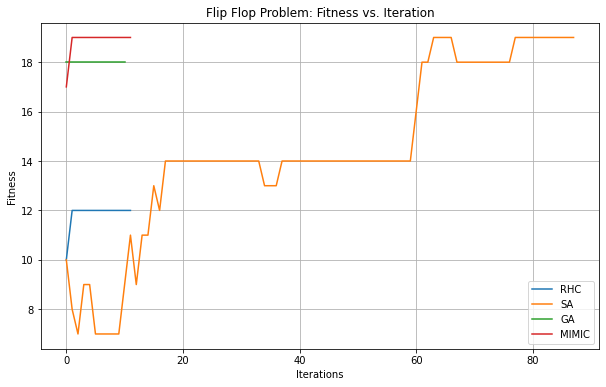

In [69]:
plot_fitness_vs_iteration("Flip Flop Problem", 
                          [result_flip_flop['RHC']['curve'], result_flip_flop['SA']['curve'], result_flip_flop['GA']['curve'], result_flip_flop['MIMIC']['curve']], 
                          ["RHC", "SA", "GA", "MIMIC"])

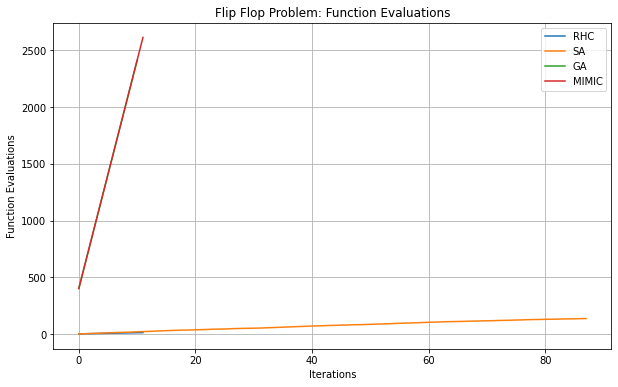

In [70]:
plot_fevals("Flip Flop Problem", 
                          [result_flip_flop['RHC']['fevals'], result_flip_flop['SA']['fevals'], result_flip_flop['GA']['fevals'], result_flip_flop['MIMIC']['fevals']], 
                          ["RHC", "SA", "GA", "MIMIC"])

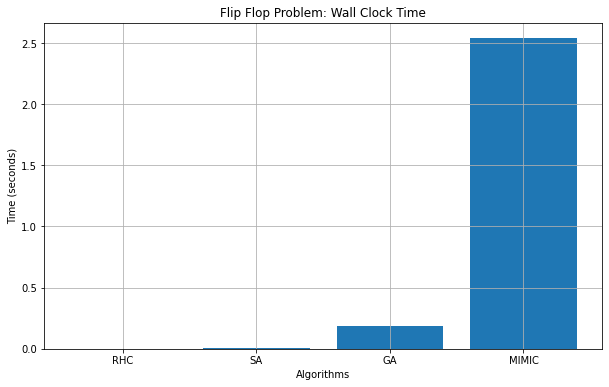

In [71]:
# Plot Wall Clock Time
plot_wall_clock_time("Flip Flop Problem", 
                     [result_flip_flop['RHC']['time'], result_flip_flop['SA']['time'], result_flip_flop['GA']['time'], result_flip_flop['MIMIC']['time']], 
                     ["RHC", "SA", "GA", "MIMIC"])

In [72]:
problem_set_flip_flop = []
for i in problem_sizes:
    problem_set_flip_flop.append(
    mlrose.DiscreteOpt(length=i, fitness_fn=fitness_flip_flop, maximize=True, max_val=2)
    )

In [73]:
result_flip_flop_sets = []
for i in range(len(problem_sizes)):
    print(problem_sizes[i])
    result_flip_flop_sets.append(
    solve_problem(problem_set_flip_flop[i])
    )

10
50
100


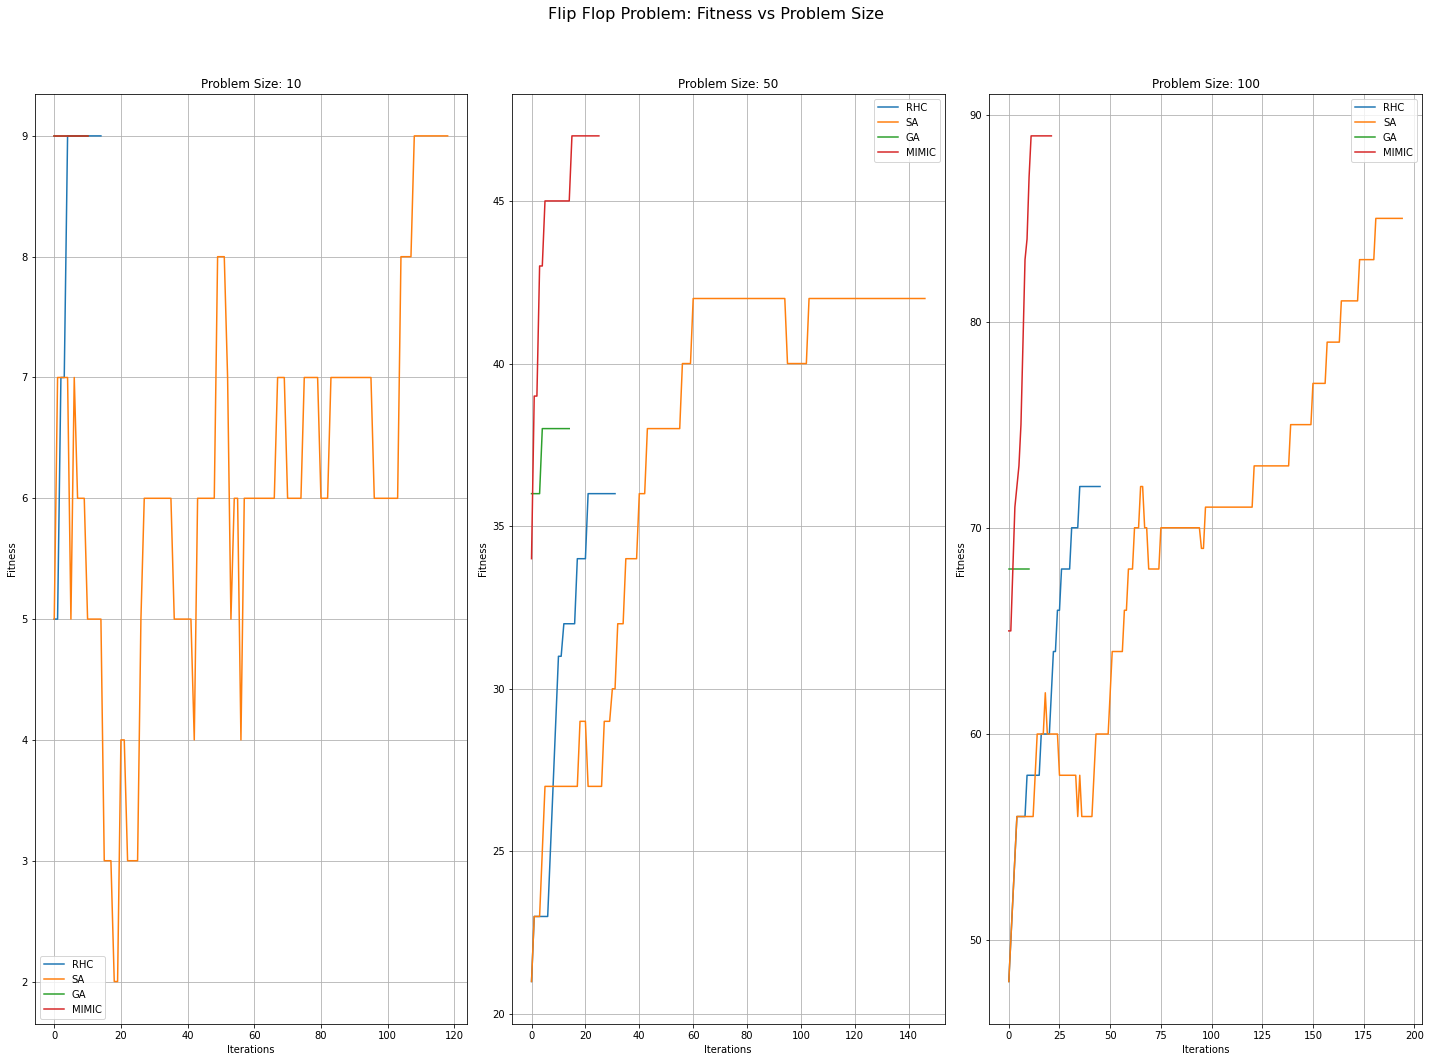

In [74]:
plot_fitness_vs_iteration_grid("Flip Flop Problem: Fitness vs Problem Size", 
                               problem_sizes, 
                               result_flip_flop_sets, 
                               labels=["RHC", "SA", "GA", "MIMIC"], 
                               algorithms=["RHC", "SA", "GA", "MIMIC"]
                              )

## Machine Learning Weight Optimization

In [4]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, LearningCurveDisplay,ValidationCurveDisplay
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, roc_curve, auc


In [5]:
from ucimlrepo import fetch_ucirepo 
import numpy as np

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [7]:
def load_dataset(test_size=0.2, random_state=42):
        id=891
        cdc_diabetes_health_indicators = fetch_ucirepo(id=id) 
        # data (as pandas dataframes) 
        X = cdc_diabetes_health_indicators.data.features 
        y = cdc_diabetes_health_indicators.data.targets
        temp  = X.copy()
        temp['Diabetes'] = y
        temp.drop_duplicates(inplace = True)
        # cols_to_drop = ['Smoker','NoDocbcCost','Sex', 'AnyHealthcare', 'Education', 'Income']
        # temp = temp.drop(columns=cols_to_drop)
        # Split the data into training and testing sets
        X,y = temp[[i for i in temp.columns if i!='Diabetes']], temp[['Diabetes']]
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

In [8]:
def preprocess_data1(X, y, random_state=42):
    """
    Preprocess the data by one-hot encoding non-binary categorical features, applying SMOTE, and scaling using RobustScaler.
    """
    categorical_features=[]
    # Identify categorical and numerical features
    for col in X.columns:
        if X[col].dtype == 'object' or len(X[col].unique()) < 10:  # Assuming categorical if less than 10 unique values
            categorical_features.append(col)
    
    # Remove binary features from numerical features list
    numerical_features = [col for col in X.columns if col not in categorical_features]

    # Define the preprocessor for the pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
            ('num', RobustScaler(), numerical_features)
        ]
    )
    # Apply the preprocessor to X
    X_preprocessed = preprocessor.fit_transform(X)
    
    # nm = NearMiss(version = 1 , n_neighbors = 10)
    # x_sm,y_sm= nm.fit_resample(X_preprocessed, y.values.ravel())
    # Apply SMOTE to the preprocessed data
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

    return X_resampled, y_resampled.values.ravel()

In [9]:
x_tr, x_te, y_tr, y_te = load_dataset()
x_train, y_train= preprocess_data1(x_tr, y_tr)
x_test, y_test = preprocess_data1(x_te, y_te)

In [10]:
best_mlp = MLPClassifier(hidden_layer_sizes=(10, 10), 
                         activation='relu', 
                         learning_rate_init=10**(-2), 
                         random_state=42,  
                         tol=0.001, 
                         early_stopping=True)

In [11]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(best_mlp, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))


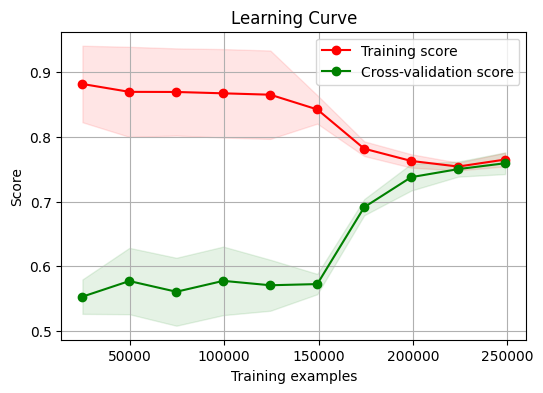

In [12]:
# Calculate mean and standard deviation for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(6, 4))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [13]:
print(f"Performance with Backpropagation - Adam Optimization")
# Evaluate on the test set
best_mlp.fit(x_train, y_train)
y_test_pred = best_mlp.predict(x_test)
print("Test Set Evaluation:")
print("F1 Score: ", f1_score(y_test, y_test_pred, average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Precision: ", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_test_pred, average='weighted'))
print("ROC AUC: ", roc_auc_score(y_test, y_test_pred))

Performance with Backpropagation - Adam Optimization
Test Set Evaluation:
F1 Score:  0.7537490447619233
Accuracy:  0.7545152397392626
Precision:  0.7577227954003678
Recall:  0.7545152397392626
ROC AUC:  0.7545152397392627


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


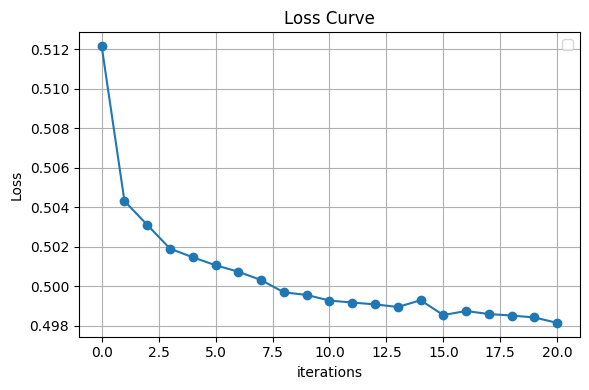

In [14]:
loss_curve = best_mlp.loss_curve_ 
plt.figure(figsize=(6, 4))  
plt.plot(loss_curve, marker='o')
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

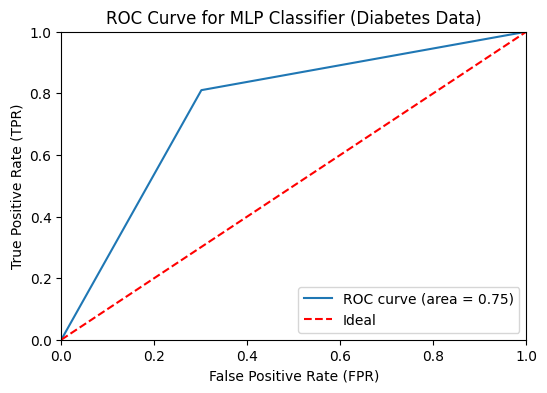

In [15]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Ideal')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for MLP Classifier (Diabetes Data)')
plt.legend(loc="lower right")
plt.show()

In [16]:
train_times = []
feval_curve = []

In [18]:
# Define the Neural Network with RHC
start_time = time.time()
model_rhc = mlrose.NeuralNetwork(hidden_nodes=[10, 10], activation='relu',
                                       algorithm='random_hill_climb', max_iters=200,
                                       bias=True, is_classifier=True, learning_rate=0.01,
                                       early_stopping=True, clip_max=5, max_attempts=50,
                                       random_state=42)

In [19]:
# Train the model
model_rhc.fit(x_train, y_train)
end_time = time.time()


In [20]:
evaluations = model_rhc.fitness_curve  # or a method to calculate total evaluations
wall_clock_time = end_time - start_time
train_times.append(wall_clock_time)
feval_curve.append(evaluations)

In [21]:
# Predict and evaluate
y_pred_rhc = model_rhc.predict(x_test)
print("RHC Test Set Evaluation:")
print("F1 Score: ", f1_score(y_test, y_pred_rhc, average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred_rhc))
print("Precision: ", precision_score(y_test, y_pred_rhc, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_rhc, average='weighted'))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_rhc))

RHC Test Set Evaluation:
F1 Score:  0.3517493845797257
Accuracy:  0.4761548965552779
Precision:  0.3973793402041926
Recall:  0.4761548965552779
ROC AUC:  0.47615489655527793


In [22]:
start_time = time.time()
# Define the Neural Network with SA
schedule = mlrose.ExpDecay()
model_sa = mlrose.NeuralNetwork(hidden_nodes=[10, 10], activation='relu',
                                      algorithm='simulated_annealing', max_iters=200,
                                      bias=True, is_classifier=True, learning_rate=0.01,
                                      early_stopping=True, clip_max=5, max_attempts=50,
                                      schedule=schedule, random_state=42)

# Train the model
model_sa.fit(x_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred_sa = model_sa.predict(x_test)
train_times.append(end_time-start_time)
feval_curve.append(model_sa.fitness_curve)

In [23]:
# Predict and evaluate
print("Simmulated Annealing Test Set Evaluation:")
print("F1 Score: ", f1_score(y_test, y_pred_sa, average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred_sa))
print("Precision: ", precision_score(y_test, y_pred_sa, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_sa, average='weighted'))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_sa))

Simmulated Annealing Test Set Evaluation:
F1 Score:  0.35163572062481385
Accuracy:  0.47703089171153995
Precision:  0.3985421406222637
Recall:  0.47703089171153995
ROC AUC:  0.47703089171153995


In [25]:
start_time = time.time()

# Define the Neural Network with GA
model_ga = mlrose.NeuralNetwork(hidden_nodes=[10, 10], activation='relu',
                                      algorithm='genetic_alg', max_iters=100,
                                      bias=True, is_classifier=True, learning_rate=0.01,
                                      early_stopping=True, clip_max=5, max_attempts=25,
                                      pop_size=200, mutation_prob=0.1, random_state=42)

# Train the model
model_ga.fit(x_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred_ga = model_ga.predict(x_test)
train_times.append(end_time-start_time)
feval_curve.append(model_ga.fitness_curve)

In [ ]:
# Predict and evaluate
print("Genetic Algorithm Test Set Evaluation:")
print("F1 Score: ", f1_score(y_test, y_pred_ga, average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred_ga))
print("Precision: ", precision_score(y_test, y_pred_ga, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_ga, average='weighted'))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_ga))

In [ ]:
start_time = time.time()
# Define the Neural Network with MIMIC
model_mi = mlrose.NeuralNetwork(hidden_nodes=[10, 10], activation='relu',
                                      algorithm='mimic', max_iters=200,
                                      bias=True, is_classifier=True, learning_rate=0.1,
                                      early_stopping=True, clip_max=5, max_attempts=50,
                                      pop_size=200, mutation_prob=0.1, random_state=42)

# Train the model
model_mi.fit(x_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred_mi = model_mi.predict(x_test)
train_times.append(end_time-start_time)
feval_curve.append(end_time.fitness_curve)

In [ ]:
# Predict and evaluate
print("MIMIC Test Set Evaluation:")
print("F1 Score: ", f1_score(y_test, y_pred_mi, average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred_mi))
print("Precision: ", precision_score(y_test, y_pred_mi, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_mi, average='weighted'))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_mi))

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
curves = [model_rhc.loss, model_sa.loss, model_ga.loss, model_mi.loss]
labels=['RHC', 'SA', 'GA', 'MIMIC']
for y_data, label in zip(curves, labels):
    plt.plot(y_data, label=label, marker='o')
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.title("Loss Curve for Optimization problem")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()